# COURSE ASSESSMENT: MACHINE LEARNING IN HEALTHCARE
## Topic: Exploratory Data Analysis (EDA) and Building a Linear Regression Model for Predicting Course Grades
### Objectives:
- Apply EDA techniques to better understand student grade data.
- Build and evaluate a Linear Regression model to predict the final course grade (HP_grade) based on other grade components.
- Analyze and interpret the results of the model.
#### Data: Use the data provided (extracted from the file in the link). The data includes information on quiz scores (KT1, KT2, KT3), average quiz score (KT_TB), bonus points (Bonus), report score (BC), process score (QT_x or QT_Y), and final exam score (CK), ultimately leading to the final course grade (HP_grade). 

Nguyen Duc Hung - 20233960


# Install dependencies and import:

dependencies can be install via dependencies.yml

In [351]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn.preprocessing import RobustScaler

Part 1: Data Preparation and Cleaning (3 points)


# Step 1: Load the data

1.	(1 point) Load the data into your working environment (e.g., Pandas DataFrame). Display the first few rows and general information about the data (number of rows, number of columns, column data types).

In [352]:
  # Load Excel file
df_843 = pd.read_excel("data/154843_merged_EDA.xlsx", sheet_name="Sheet1")
df_844 = pd.read_excel("data/154844_merged_EDA.xlsx", sheet_name="Sheet1")
df_394 = pd.read_excel("data/156394_395_merged.xlsx", sheet_name="Sheet1")
df_560 = pd.read_excel("data/152560_merged.xlsx", sheet_name="1. 152560-ET2031E") 
df_576 = pd.read_excel("data/152576_merged.xlsx", sheet_name="152576-ET2030E")
 # Display first 5 rows
for df in [df_843, df_844, df_394, df_560, df_576]:
    print(df.head())

   STT   KT1   KT2   KT3  KT_TB  Bonus    BC  QT_x  QT_y   CK  HP_grade
0    1  9.00  5.67  8.00   7.56      2  7.75  7.91   8.0  6.0       6.6
1    2  9.00  6.50  8.00   7.83      0  9.38  8.61   8.5  5.0       6.1
2    3  9.67  6.17  6.88   7.57      1  8.00  7.91   8.0  9.0       8.7
3    4  8.00  4.33  3.00   5.11      2  8.25  6.93   7.0  8.5       8.1
4    5  8.00  5.00  3.50   5.50     -1  8.50  6.88   7.0  6.0       6.3
    KT1   KT2   KT3  KT_TB    BC  QT_x  QT_y   CK  HP_grade
0     9  8.33  6.29   7.87  7.75  7.81   8.0  6.0       6.6
1  9.33  8.50   5.5   7.78  9.75  9.02   9.0  7.0       7.6
2     5  9.00  5.04   6.35  8.50  7.43   7.5  4.0       5.1
3  5.78  7.83  7.71   7.11  7.50  7.43   7.5  6.5       6.8
4  8.67  7.50  4.75   6.97  9.38  8.30   8.5  6.0       6.8
    KT1   KT2   KT3  KT_TB    BC  Bonus  QT_x  QT_y   CK  HP_grade
0  8.11  7.00  6.75   7.29  9.25   0.25  8.52   8.5  7.5       7.8
1  8.78  4.33  4.50   5.87  8.25   0.75  7.81   8.0  7.5       7.7
2  9.33

We see that there are unrelated and personal data: index and ID, we have to delete them:
- Class 843 have Index (STT) column
- Class 560 and 576 have ID (MSSV) and Index (STT) column



In [353]:
# Delete unrelated columns:
# Deleting index
for dataframe in [df_843, df_560, df_576]:
    dataframe.drop(columns=["STT"], inplace=True)
# Deleting MSSV
# MSSV is the student ID, which is not needed for analysis
for dataframe in [df_560, df_576]:
    dataframe.drop(columns=["MSSV"], inplace=True)
# Display all columns
# Store all column sets
column_sets = []

for dataframe in [df_843, df_844, df_394, df_560, df_576]:
    print(f"Columns in dataframe: {dataframe.columns.tolist()}")
    column_sets.append(set(dataframe.columns))

# Find common columns across all dataframes
common_columns = set.intersection(*column_sets)
print("\nCommon columns across all dataframes:")
print(sorted(common_columns))



Columns in dataframe: ['KT1', 'KT2', 'KT3', 'KT_TB', 'Bonus', 'BC', 'QT_x', 'QT_y', 'CK', 'HP_grade']
Columns in dataframe: ['KT1', 'KT2', 'KT3', 'KT_TB', 'BC', 'QT_x', 'QT_y', 'CK', 'HP_grade']
Columns in dataframe: ['KT1', 'KT2', 'KT3', 'KT_TB', 'BC', 'Bonus', 'QT_x', 'QT_y', 'CK', 'HP_grade']
Columns in dataframe: ['Bonus', 'KT1', 'KT2', 'KT3', 'KT_TB', 'BC', 'QT_x', 'QT_y', 'CK_raw', 'CK', 'HP_grade']
Columns in dataframe: ['Bonus', 'KT1', 'KT2', 'KT3', 'Điểm BC 1', 'Điểm BC QT Final', 'BC', 'QT_x', 'QT_y', 'KT_TB', 'CK_raw', 'CK', 'HP_grade']

Common columns across all dataframes:
['BC', 'CK', 'HP_grade', 'KT1', 'KT2', 'KT3', 'KT_TB', 'QT_x', 'QT_y']


- We see the columns of the dataset have names that are not standardized. And CK_raw of class 560, 576 does not exist in other datasets. Since it is a rounding of the "CK" column, we can drop it out.
- Based on our observation, we have the same BC (Report) score across all datasets, so we should not use too specific columns such as "Diem BC 1" and "Diem BC QT Final" because it can introduce bias in class 576
- Common column: ['BC', 'CK', 'HP_grade', 'KT1', 'KT2', 'KT3', 'KT_TB', 'QT_x', 'QT_y']

In [354]:
# Drop the "CK_raw" column from df_560 and df_576
df_560.drop(columns=["CK_raw"], inplace=True)
df_576.drop(columns=["CK_raw"], inplace=True)
# Drop the "Điểm BC 1" and "Điểm BC QT Final" column from df_560 and df_576
df_576.drop(columns=["Điểm BC 1", "Điểm BC QT Final"], inplace=True)



Let's look at the basic info of the dataset: general information about the data (number of rows, number of columns, column data types).

In [355]:
# general information about the data (number of rows, number of columns, column data types).
for dataframe in [df_843, df_844, df_394, df_560, df_576]:
    print(dataframe.info())
    print(dataframe.describe())
    print(dataframe.columns)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   KT1       60 non-null     float64
 1   KT2       60 non-null     float64
 2   KT3       58 non-null     float64
 3   KT_TB     65 non-null     float64
 4   Bonus     65 non-null     int64  
 5   BC        63 non-null     float64
 6   QT_x      64 non-null     float64
 7   QT_y      64 non-null     float64
 8   CK        64 non-null     float64
 9   HP_grade  64 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 5.2 KB
None
             KT1        KT2        KT3      KT_TB      Bonus         BC  \
count  60.000000  60.000000  58.000000  65.000000  65.000000  63.000000   
mean    8.026167   5.594167   6.418621   6.132154  -0.476923   7.170794   
std     1.170372   1.793609   1.645847   2.129543   2.024133   2.023256   
min     4.670000   2.330000   2.250000   0.000000  -5.000000   0.000000   

Let's take a look into the data:

# Step 2: Handling missing values

2.	(1.5 points) Identify and handle missing values (NaN). Clearly state the handling method you choose (e.g., deleting rows/columns, replacing with mean/median, etc.) and explain your reasoning. Pay special attention to columns that might have missing values such as KT3, BC, CK, HP_grade.

First, we check for missing values and invalid values (because except from bonus, no point should be below 0)

In [356]:
def display_invalid_data(dataframes, names):
    for name, df in zip(names, dataframes):
        print(f"\n=== {name} ===")

        # 1. Rows with any NaNs
        rows_with_nan = df[df.isna().any(axis=1)]
        print(f"\n{name} - Rows with missing data:")
        print(rows_with_nan)

        # 2. Rows where at least one (non-Bonus) numeric column is < 0
        numeric_cols = df.select_dtypes(include='number').columns.tolist()
        if 'Bonus' in numeric_cols:
            numeric_cols.remove('Bonus')

        rows_any_negative = df[numeric_cols].lt(0).any(axis=1)
        print(f"\n{name} - Rows where any (non-Bonus) numeric column is < 0:")
        print(df[rows_any_negative])

In [357]:
dataframes = [df_843, df_844, df_394, df_560, df_576]
names = ["df_843", "df_844", "df_394", "df_560", "df_576"]

# Display invalid data for each dataframe
display_invalid_data(dataframes, names)



=== df_843 ===

df_843 - Rows with missing data:
     KT1  KT2  KT3  KT_TB  Bonus    BC  QT_x  QT_y   CK  HP_grade
6   8.33  7.0  NaN   5.11      0  8.50  6.81   7.0  9.0       8.4
14   NaN  NaN  NaN   0.00     -4   NaN -0.50   0.0  0.0       0.0
15   NaN  NaN  NaN   0.00     -4  0.00 -0.50   0.0  0.0       0.0
24   NaN  NaN  NaN   0.00     -3   NaN   NaN   0.0  0.0       0.0
33  8.67  4.0  NaN   6.34      0  7.75  7.05   7.0  6.5       6.7
41   NaN  NaN  NaN   0.00     -4  0.00 -0.50   NaN  NaN       NaN
46   NaN  NaN  NaN   0.00     -4  0.00 -0.50   0.0  0.0       0.0

df_843 - Rows where any (non-Bonus) numeric column is < 0:
    KT1  KT2  KT3  KT_TB  Bonus   BC  QT_x  QT_y   CK  HP_grade
14  NaN  NaN  NaN    0.0     -4  NaN  -0.5   0.0  0.0       0.0
15  NaN  NaN  NaN    0.0     -4  0.0  -0.5   0.0  0.0       0.0
41  NaN  NaN  NaN    0.0     -4  0.0  -0.5   NaN  NaN       NaN
46  NaN  NaN  NaN    0.0     -4  0.0  -0.5   0.0  0.0       0.0

=== df_844 ===

df_844 - Rows with missin

Every row containing negative or `NaN` values in the `QT_x` column will be eradicated. This decision is based on the rationale that such data points are unreliable at best and useless at worst. Negative `QT_x` values defy expected physical constraints, and missing values indicate incomplete measurements, both of which can introduce bias or noise into downstream analysis.


In [358]:
# Delete invalid rows: NaN or negative values in QT_x column
for df in [df_843, df_844, df_394, df_560, df_576]:
    df.drop(df[df['QT_x'].isna() | (df['QT_x'] < 0)].index, inplace=True)

# Display the number of rows after deletion
display_invalid_data(dataframes, names)



=== df_843 ===

df_843 - Rows with missing data:
     KT1  KT2  KT3  KT_TB  Bonus    BC  QT_x  QT_y   CK  HP_grade
6   8.33  7.0  NaN   5.11      0  8.50  6.81   7.0  9.0       8.4
33  8.67  4.0  NaN   6.34      0  7.75  7.05   7.0  6.5       6.7

df_843 - Rows where any (non-Bonus) numeric column is < 0:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, Bonus, BC, QT_x, QT_y, CK, HP_grade]
Index: []

=== df_844 ===

df_844 - Rows with missing data:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, BC, QT_x, QT_y, CK, HP_grade]
Index: []

df_844 - Rows where any (non-Bonus) numeric column is < 0:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, BC, QT_x, QT_y, CK, HP_grade]
Index: []

=== df_394 ===

df_394 - Rows with missing data:
      KT1   KT2   KT3  KT_TB    BC  Bonus  QT_x  QT_y   CK  HP_grade
34   8.33   NaN  3.00   3.78  7.00    0.0  5.39   5.5  5.5       5.5
94   9.44   NaN  5.75   7.60  6.50    0.0  7.18   7.0  9.0       8.4
107  7.67  6.33   NaN   4.67  6.75    0.0  5.71   5.5 

- We have seen some anomalies of missing data in the system:
+ Class 843 having only missing KT3 scores. We can fix by using the mean of the column of the class.
+ Class 394 having only missing KT2 and KT3 but not inclusively. So the same fix can happen.
+ Class 560 have anomalies of CK and HP_grade have very low score. Prediction is not helpful or viable. Delete them.
+ Class 576 have index 3 and 22 as huge anomalies. QT_x high bit low CK and too much empty data. Delete them.
+ The rest can be replaced with the mean of the data. Fill NaN with mean of column KT1, KT2, KT3

In [359]:
# --- Fix missing KT scores by filling with the class-wise mean ---

# For Class 843: fill missing KT3 scores with the mean of KT3
df_843['KT3'] = df_843['KT3'].fillna(df_843['KT3'].mean())

# For Class 394: fill missing KT2 and KT3 scores with respective class means
df_394['KT2'] = df_394['KT2'].fillna(df_394['KT2'].mean())
df_394['KT3'] = df_394['KT3'].fillna(df_394['KT3'].mean())

# --- Handle outlier classes ---

# For Class 560: drop rows where HP_grade (final conclusive point) is missing
df_560 = df_560.drop(index=df_560[df_560['HP_grade'].isna()].index)

# For Class 576: remove specific anomalies at index 3 and 22
df_576 = df_576.drop(index=[3, 22])

# Fill remaining NaN in KT1, KT2, KT3 with class-wise mean in Class 576
for col in ['KT1', 'KT2', 'KT3']:
    df_576[col] = df_576[col].fillna(df_576[col].mean())
    
dataframes = [df_843, df_844, df_394, df_560, df_576]
names = ["df_843", "df_844", "df_394", "df_560", "df_576"]
display_invalid_data(dataframes, names)



=== df_843 ===

df_843 - Rows with missing data:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, Bonus, BC, QT_x, QT_y, CK, HP_grade]
Index: []

df_843 - Rows where any (non-Bonus) numeric column is < 0:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, Bonus, BC, QT_x, QT_y, CK, HP_grade]
Index: []

=== df_844 ===

df_844 - Rows with missing data:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, BC, QT_x, QT_y, CK, HP_grade]
Index: []

df_844 - Rows where any (non-Bonus) numeric column is < 0:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, BC, QT_x, QT_y, CK, HP_grade]
Index: []

=== df_394 ===

df_394 - Rows with missing data:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, BC, Bonus, QT_x, QT_y, CK, HP_grade]
Index: []

df_394 - Rows where any (non-Bonus) numeric column is < 0:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, BC, Bonus, QT_x, QT_y, CK, HP_grade]
Index: []

=== df_560 ===

df_560 - Rows with missing data:
Empty DataFrame
Columns: [Bonus, KT1, KT2, KT3, KT_TB, BC, QT_x,

There are no more missing data. But we may miss something. Remember the KT_TB? It is the average of the quizzes. We must replace them with the new data we imputed above. But before that, we must make sure they are the same type.

# Step 3: Handling types

3.	(0.5 points) Check and ensure that the data types of the columns containing scores are numeric. Perform conversions if necessary.

In [360]:
for df in dataframes:
    for name, df in zip(names, dataframes):
        print(f"\n=== {name} ===")
        print(df.info())



=== df_843 ===
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 64
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   KT1       60 non-null     float64
 1   KT2       60 non-null     float64
 2   KT3       60 non-null     float64
 3   KT_TB     60 non-null     float64
 4   Bonus     60 non-null     int64  
 5   BC        60 non-null     float64
 6   QT_x      60 non-null     float64
 7   QT_y      60 non-null     float64
 8   CK        60 non-null     float64
 9   HP_grade  60 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 5.2 KB
None

=== df_844 ===
<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 0 to 70
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   KT1       68 non-null     object 
 1   KT2       68 non-null     float64
 2   KT3       68 non-null     object 
 3   KT_TB     68 non-null     float64
 4   BC        6

We see, there are object and int64 type. Let's enforce float64.

Wait a minute, there is something, 'x' string somewhere. Let's locate it.

In [361]:
for df, name in zip(dataframes, names):
    for col in df.columns:
        bad_vals = df[~df[col].astype(str).str.replace('.', '', 1).str.replace('-', '', 1).str.isnumeric()][col].unique()
        if len(bad_vals) > 0:
            print("In dataframe:", name)
            print(f"Column {col} has non-numeric values: {bad_vals}")


In dataframe: df_844
Column KT1 has non-numeric values: ['x']
In dataframe: df_844
Column KT3 has non-numeric values: ['x ']


Let's replace it with NaN:

In [362]:
invalid_values = ['x', 'x ']
# Replace them with actual NaN
df_844.replace(invalid_values, pd.NA, inplace=True)

display_invalid_data(dataframes, names)


=== df_843 ===

df_843 - Rows with missing data:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, Bonus, BC, QT_x, QT_y, CK, HP_grade]
Index: []

df_843 - Rows where any (non-Bonus) numeric column is < 0:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, Bonus, BC, QT_x, QT_y, CK, HP_grade]
Index: []

=== df_844 ===

df_844 - Rows with missing data:
     KT1   KT2   KT3  KT_TB    BC  QT_x  QT_y   CK  HP_grade
35  8.56  6.67  <NA>   7.62  9.38  8.75   9.0  3.0       4.8
44  <NA>  6.33  5.33   5.83  9.50  7.79   8.0  7.5       7.7
49  8.11  8.83  <NA>   8.47  7.50  8.36   8.5  4.5       5.7

df_844 - Rows where any (non-Bonus) numeric column is < 0:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, BC, QT_x, QT_y, CK, HP_grade]
Index: []

=== df_394 ===

df_394 - Rows with missing data:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, BC, Bonus, QT_x, QT_y, CK, HP_grade]
Index: []

df_394 - Rows where any (non-Bonus) numeric column is < 0:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, BC, B

In [363]:
# --- Fill NaN values in KT1, KT2, KT3 with class-wise mean ---
for col in ['KT1', 'KT2', 'KT3']:
    # Ensure the column is of numeric type before filling NaN
    df_844[col] = pd.to_numeric(df_844[col], errors='coerce')  # Convert to numeric, invalid parsing will become NaN
    df_844[col] = df_844[col].fillna(df_844[col].mean())  # Fill NaN with the mean

display_invalid_data(dataframes, names)


=== df_843 ===

df_843 - Rows with missing data:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, Bonus, BC, QT_x, QT_y, CK, HP_grade]
Index: []

df_843 - Rows where any (non-Bonus) numeric column is < 0:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, Bonus, BC, QT_x, QT_y, CK, HP_grade]
Index: []

=== df_844 ===

df_844 - Rows with missing data:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, BC, QT_x, QT_y, CK, HP_grade]
Index: []

df_844 - Rows where any (non-Bonus) numeric column is < 0:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, BC, QT_x, QT_y, CK, HP_grade]
Index: []

=== df_394 ===

df_394 - Rows with missing data:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, BC, Bonus, QT_x, QT_y, CK, HP_grade]
Index: []

df_394 - Rows where any (non-Bonus) numeric column is < 0:
Empty DataFrame
Columns: [KT1, KT2, KT3, KT_TB, BC, Bonus, QT_x, QT_y, CK, HP_grade]
Index: []

=== df_560 ===

df_560 - Rows with missing data:
Empty DataFrame
Columns: [Bonus, KT1, KT2, KT3, KT_TB, BC, QT_x,

Let's try to convert again:

In [364]:
dataframes = [df_843, df_844, df_394, df_560, df_576]
df_844['Bonus'] = 0.0
# Ensure the column is explicitly of type float64
df_844['Bonus'] = df['Bonus'].astype('float64')

names = ["df_843", "df_844", "df_394", "df_560", "df_576"]
for df, name in zip(dataframes, names):
    df["Bonus"] = df["Bonus"].astype(float)  # Convert Bonus to float

for df, name in zip(dataframes, names):
    print(f"\n=== {name} ===")
    print(df.info())


=== df_843 ===
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 64
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   KT1       60 non-null     float64
 1   KT2       60 non-null     float64
 2   KT3       60 non-null     float64
 3   KT_TB     60 non-null     float64
 4   Bonus     60 non-null     float64
 5   BC        60 non-null     float64
 6   QT_x      60 non-null     float64
 7   QT_y      60 non-null     float64
 8   CK        60 non-null     float64
 9   HP_grade  60 non-null     float64
dtypes: float64(10)
memory usage: 5.2 KB
None

=== df_844 ===
<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 0 to 70
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   KT1       68 non-null     float64
 1   KT2       68 non-null     float64
 2   KT3       68 non-null     float64
 3   KT_TB     68 non-null     float64
 4   BC        68 non-nu

In [365]:
for df in dataframes:
    # Recalculate KT_TB as the mean of KT1, KT2, and KT3 across each row
    df['KT_TB'] = df[['KT1', 'KT2', 'KT3']].mean(axis=1)

We are done part 1. We make sure that data is clean, unified and free of obvious anomalies.

# Step 4: Descriptive Statistics

1.	(1.5 points) Calculate and present basic descriptive statistics (count, mean, standard deviation, min, max, quartiles) for the key score columns: KT1, KT2, KT3, KT_TB, Bonus, BC, QT_x (or QT_Y - choose one representative column for the process score if there are differences), CK, and HP_grade.

In [366]:
# Descriptive Statistics
for df, name in zip(dataframes, names):
    print(f"\n=== {name} ===")
    print(df.describe())


=== df_843 ===
             KT1        KT2        KT3      KT_TB      Bonus         BC  \
count  60.000000  60.000000  60.000000  60.000000  60.000000  60.000000   
mean    8.026167   5.594167   6.418621   6.679651  -0.200000   7.529333   
std     1.170372   1.793609   1.617711   1.196574   1.848499   1.247555   
min     4.670000   2.330000   2.250000   3.696667  -5.000000   5.000000   
25%     7.485000   3.957500   5.500000   5.886667  -1.000000   6.750000   
50%     8.330000   5.165000   6.940000   6.615000   0.000000   7.625000   
75%     8.845000   7.210000   7.500000   7.666667   1.000000   8.250000   
max     9.670000   9.170000   8.500000   8.833333   7.000000  10.000000   

            QT_x       QT_y         CK   HP_grade  
count  60.000000  60.000000  60.000000  60.000000  
mean    7.063667   7.075000   6.766667   6.881667  
std     1.009870   1.044862   1.468502   1.106145  
min     4.900000   5.000000   4.000000   4.700000  
25%     6.530000   6.500000   5.875000   6.10000

In next calculations, we will choose QT_y because it is the nearest result to the final Y: HP_Grade.

The Bonus points seem to have a large disreprancy. Maybe a standardization is required.

# Step 5: Plots

2.	(1.5 points) Visualize the distribution of the target variable HP_grade using a Histogram and/or a Kernel Density Estimate (KDE) plot. Comment on the shape of the course grade distribution.
Histogram first.

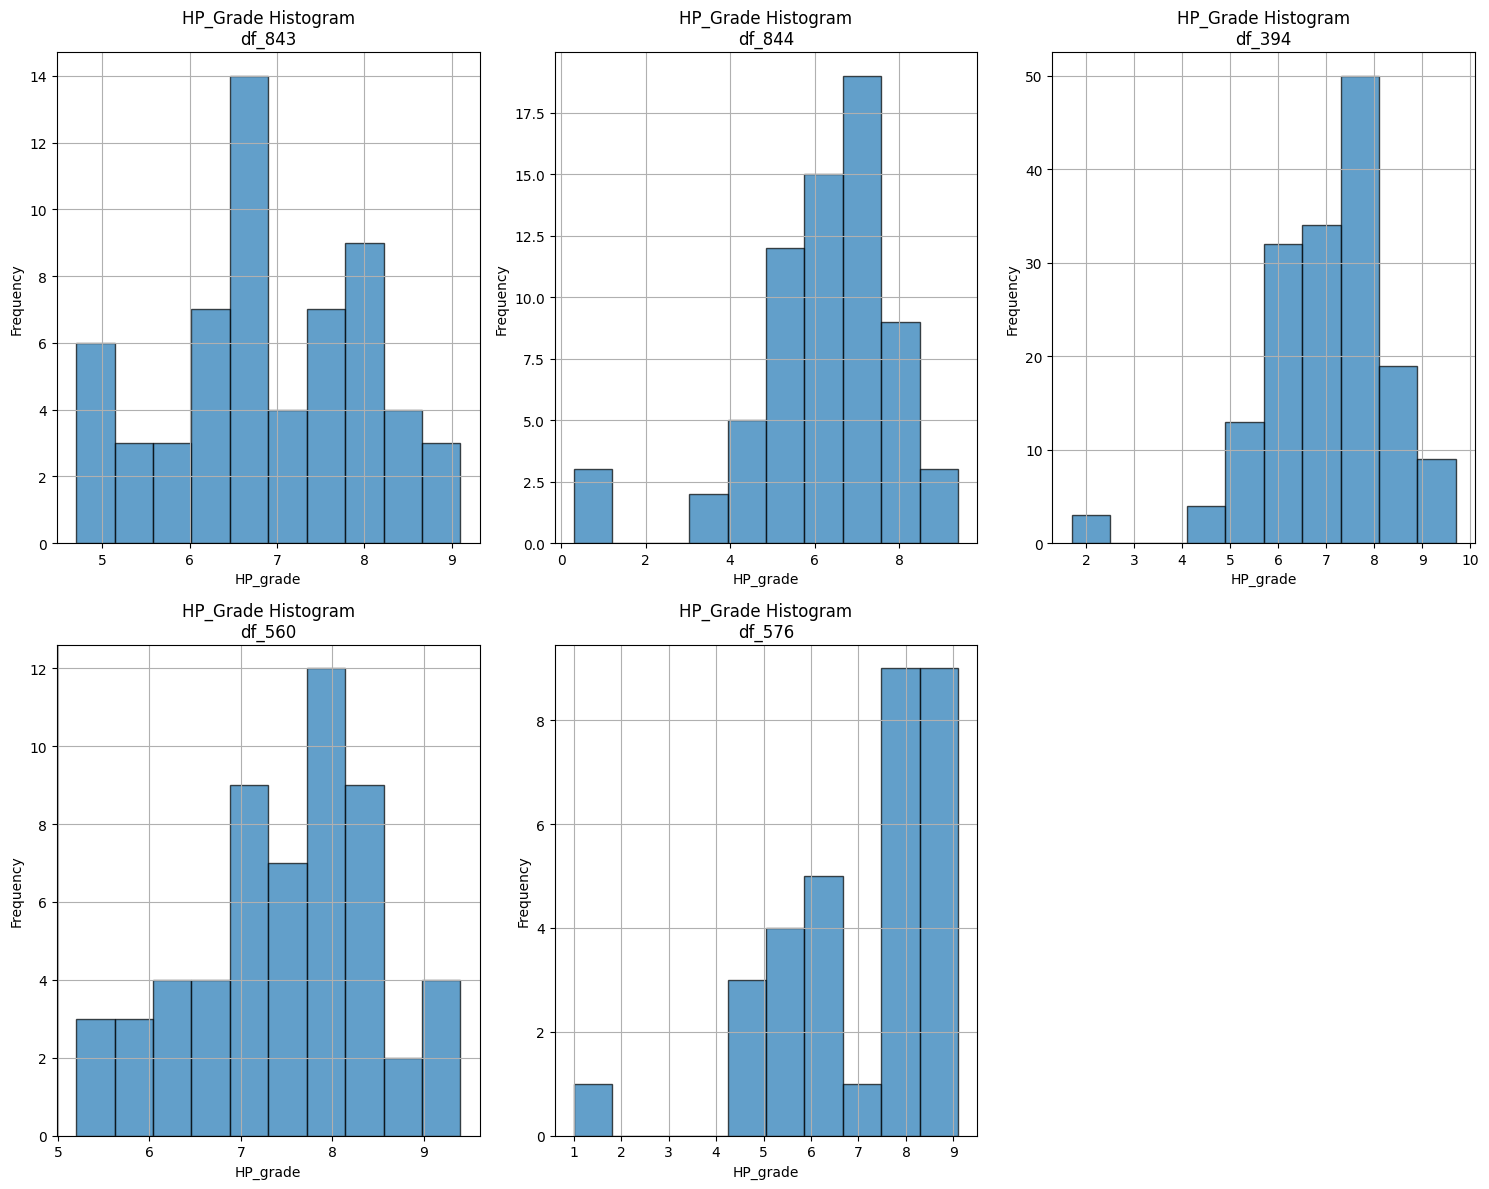

In [367]:
# Number of rows and columns in the grid (you can adjust this as needed)
num_columns = 3  # Number of columns in the grid
num_rows = (len(names) // num_columns) + (1 if len(names) % num_columns != 0 else 0)  # Calculate number of rows

# Create the figure and axes for the grid layout
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each dataframe and plot the histogram
for i, (name, df) in enumerate(zip(names, dataframes)):
    ax = axes[i]  # Select the corresponding axis
    ax.hist(df['HP_grade'], bins=10, edgecolor='black', alpha=0.7)  # Plot histogram
    ax.set_title(f'HP_Grade Histogram\n{name}')  # Title with dataframe name
    ax.set_xlabel('HP_grade')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Remove any unused subplots if there are more axes than dataframes
for i in range(len(names), len(axes)):
    axes[i].axis('off')  # Hide unused subplots

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Analysis of HP_Grade Histograms

We have examined five histograms displaying the frequency distribution of "HP_grade" for different datasets (df_843, df_844, df_394, df_560, and df_576).

**Observations:**

* The distributions of HP\_grade vary significantly across the different datasets, suggesting different underlying characteristics for each group.
* Histograms for df\_844 and df\_394 show a skew towards higher HP\_grade values, with peaks around 7. df\_394 also has a larger sample size based on the frequency scale.
* df\_843 exhibits a more multi-modal distribution with peaks around 5, 7, and 8.
* df\_560 shows a distribution that is somewhat normal or slightly right-skewed, peaking around an HP\_grade of 8.
* df\_576 displays a strong right skew, with the highest frequency observed for higher HP\_grade values (around 9).


We can see the most corellated columns are “QT_x” and “Điểm thi cuối kỳ”.

# Step 6: Independent Variables

3.	(2 points) Visualize the distribution of a few important independent variables (e.g., KT_TB, CK, QT_x/QT_Y) using appropriate plots (Histogram, Box plot). Comment on the distribution characteristics of these variables.

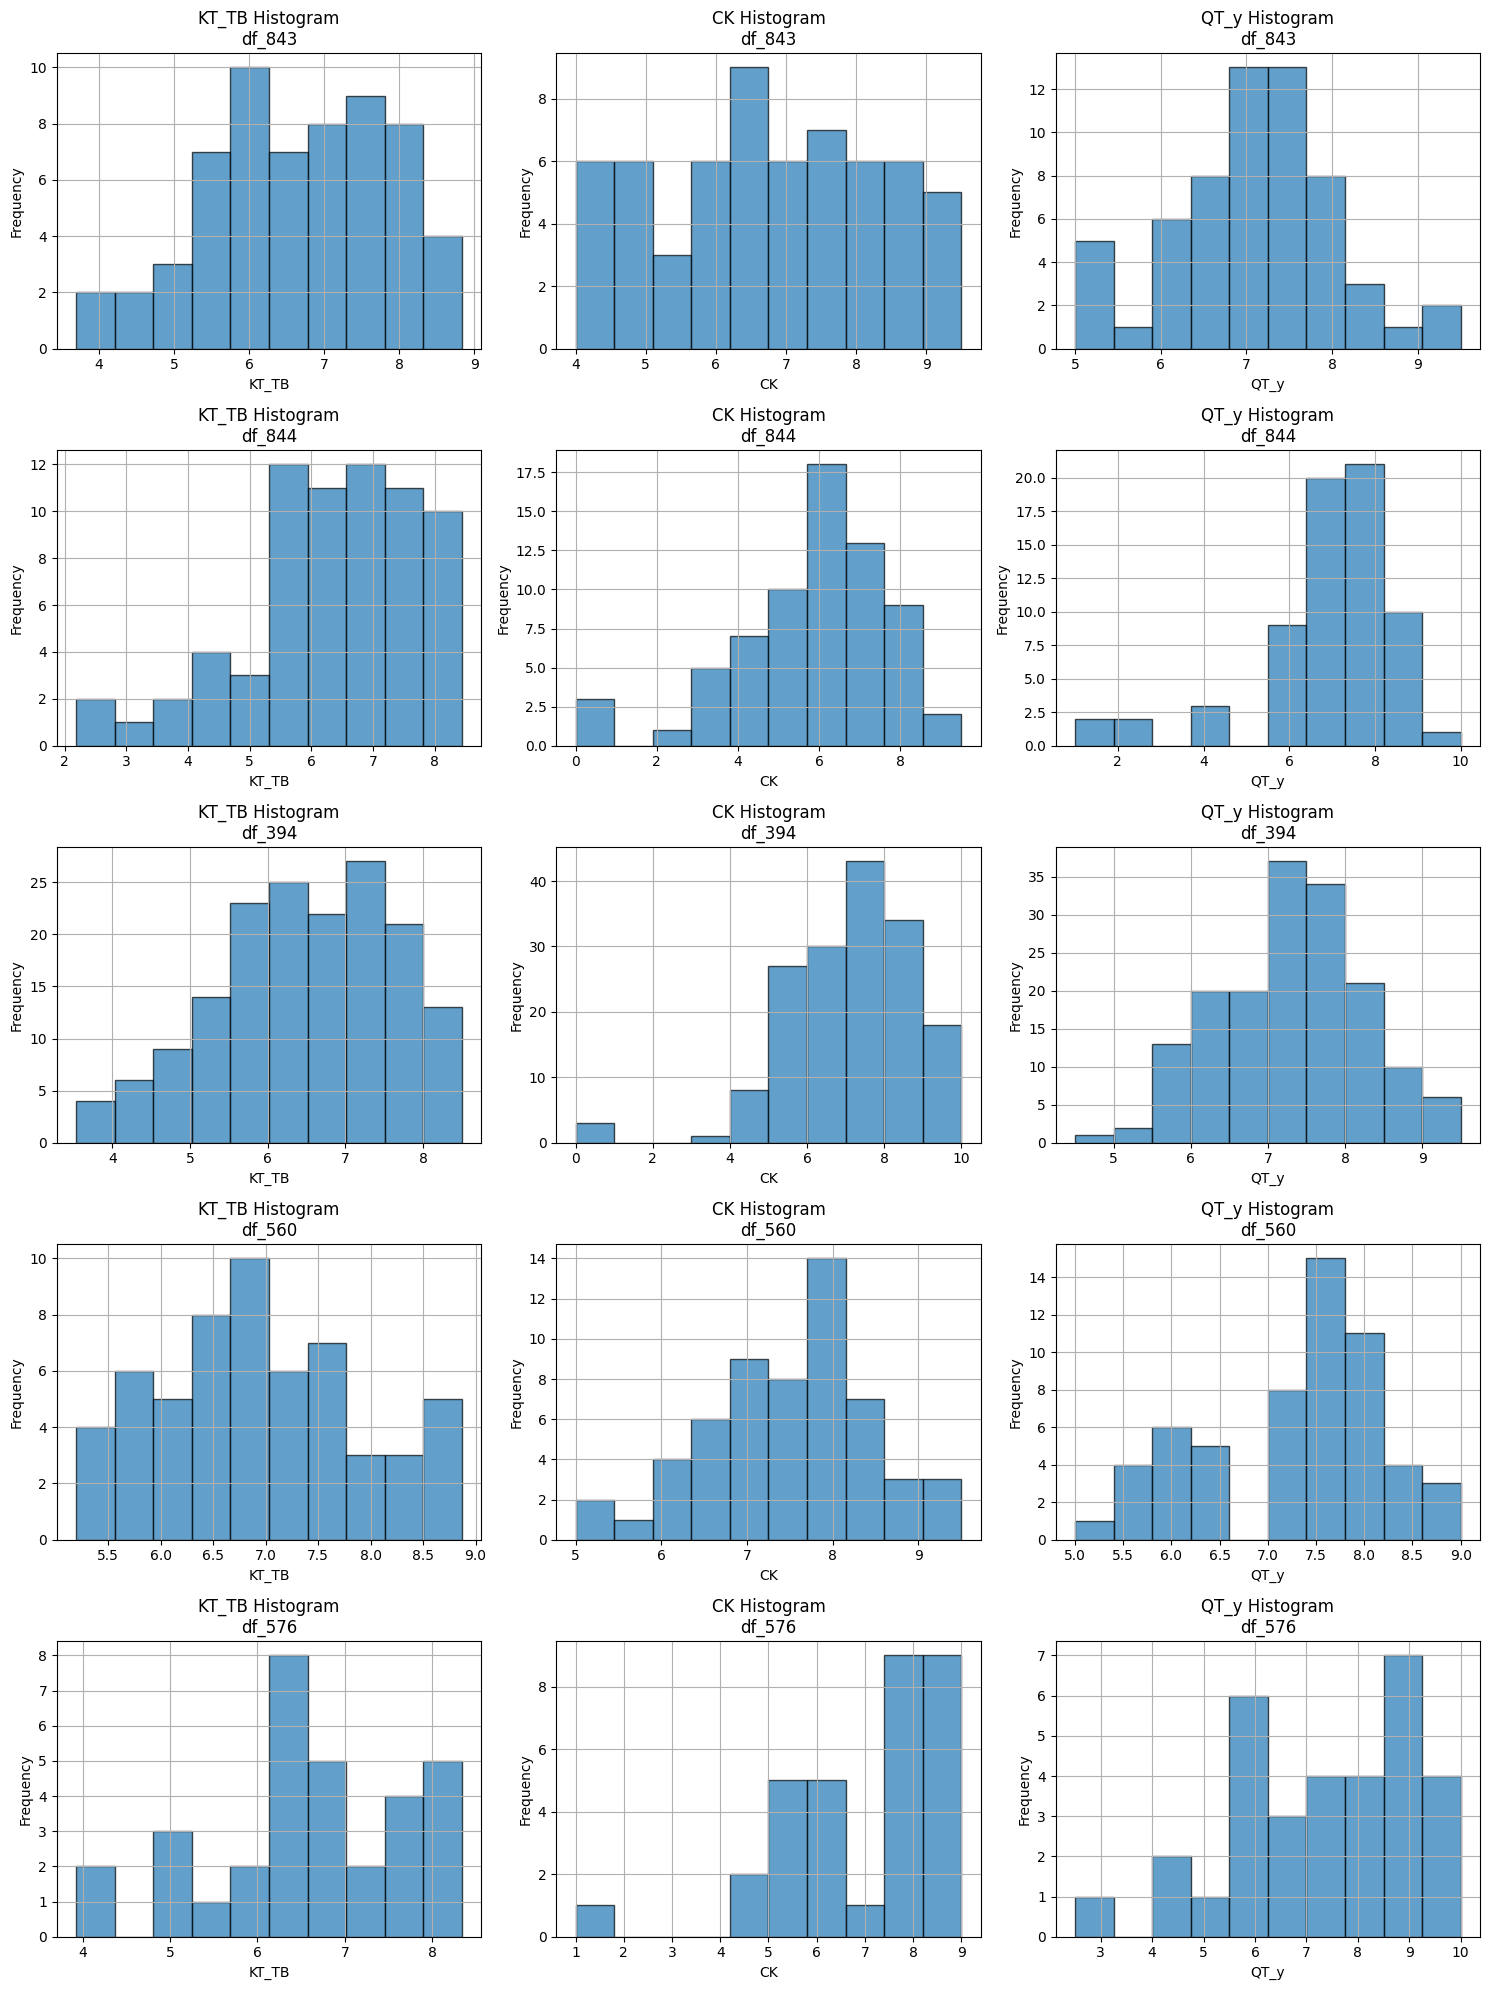

In [368]:
# Variables
indepentent_var = ['KT_TB', 'CK', 'QT_y']
total_plots = len(dataframes) * len(indepentent_var)
num_columns = 3
num_rows = (total_plots // num_columns) + (1 if total_plots % num_columns != 0 else 0)

# Create the figure and axes
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))
axes = axes.flatten()

# Plot histograms
plot_idx = 0
for name, df in zip(names, dataframes):
    for col in indepentent_var:
        ax = axes[plot_idx]
        if col in df.columns:  # Only plot if column exists in the dataframe
            ax.hist(df[col].dropna(), bins=10, edgecolor='black', alpha=0.7)
            ax.set_title(f'{col} Histogram\n{name}')
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
            ax.grid(True)
        else:
            ax.set_visible(False)
        plot_idx += 1

# Turn off any unused axes
for i in range(plot_idx, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

We should combine the datasets of all classes together. But some need a bit normalization on the bonus.

In [369]:
for df, name in zip(dataframes, names):
    df.to_csv(f'data/csv/{name}.csv', index=False)
scaler = RobustScaler()
# Scale the data using RobustScaler
for df in dataframes:
    df["Bonus"] = scaler.fit_transform(df[["Bonus"]])

combined_df = pd.concat(dataframes, ignore_index=True)

We should see some of the combined df to test out:

In [370]:
print(combined_df.head())
print(combined_df.info())
print(combined_df.describe())

    KT1   KT2   KT3     KT_TB  Bonus    BC  QT_x  QT_y   CK  HP_grade
0  9.00  5.67  8.00  7.556667    1.0  7.75  7.91   8.0  6.0       6.6
1  9.00  6.50  8.00  7.833333    0.0  9.38  8.61   8.5  5.0       6.1
2  9.67  6.17  6.88  7.573333    0.5  8.00  7.91   8.0  9.0       8.7
3  8.00  4.33  3.00  5.110000    1.0  8.25  6.93   7.0  8.5       8.1
4  8.00  5.00  3.50  5.500000   -0.5  8.50  6.88   7.0  6.0       6.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   KT1       381 non-null    float64
 1   KT2       381 non-null    float64
 2   KT3       381 non-null    float64
 3   KT_TB     381 non-null    float64
 4   Bonus     345 non-null    float64
 5   BC        381 non-null    float64
 6   QT_x      381 non-null    float64
 7   QT_y      381 non-null    float64
 8   CK        381 non-null    float64
 9   HP_grade  381 non-null    float64
dtypes:

It seems checks out. Continue with the histograms.

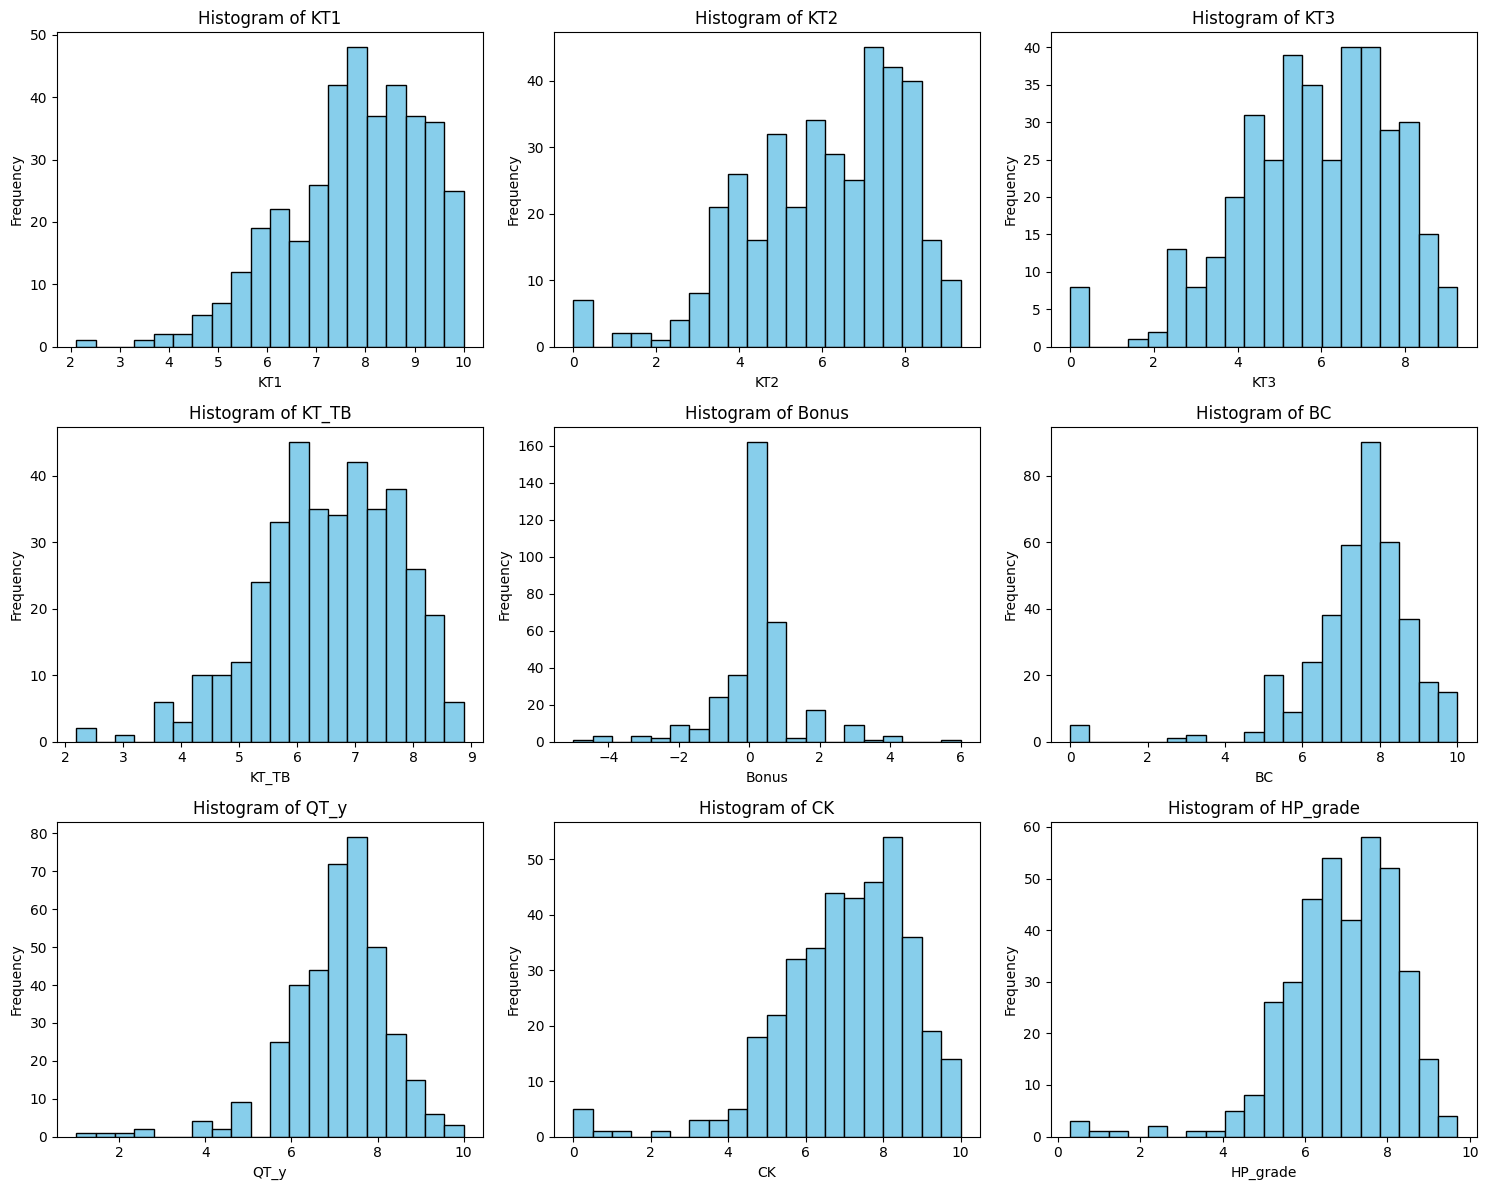

In [371]:
stats = ["KT1", "KT2", "KT3", "KT_TB", "Bonus", "BC", "QT_y", "CK", "HP_grade"]

# Set up grid size based on number of stats
n_cols = 3
n_rows = (len(stats) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, stat in enumerate(stats):
    axes[i].hist(combined_df[stat].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {stat}')
    axes[i].set_xlabel(stat)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(len(stats), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Step 7: Explore Relationships

4.	(2 points) Explore the relationship between the target variable HP_grade and potential independent variables using Scatter plots. Plot at least 2 graphs (e.g., HP_grade vs CK, HP_grade vs QT_x/QT_Y). Provide preliminary comments on the relationship (strong/weak linearity, positive/negative). Plot a correlation matrix heatmap for all numeric variables and comment on the correlation level between independent variables and the target variable, as well as between independent variables themselves (phenomenon of multicollinearity).

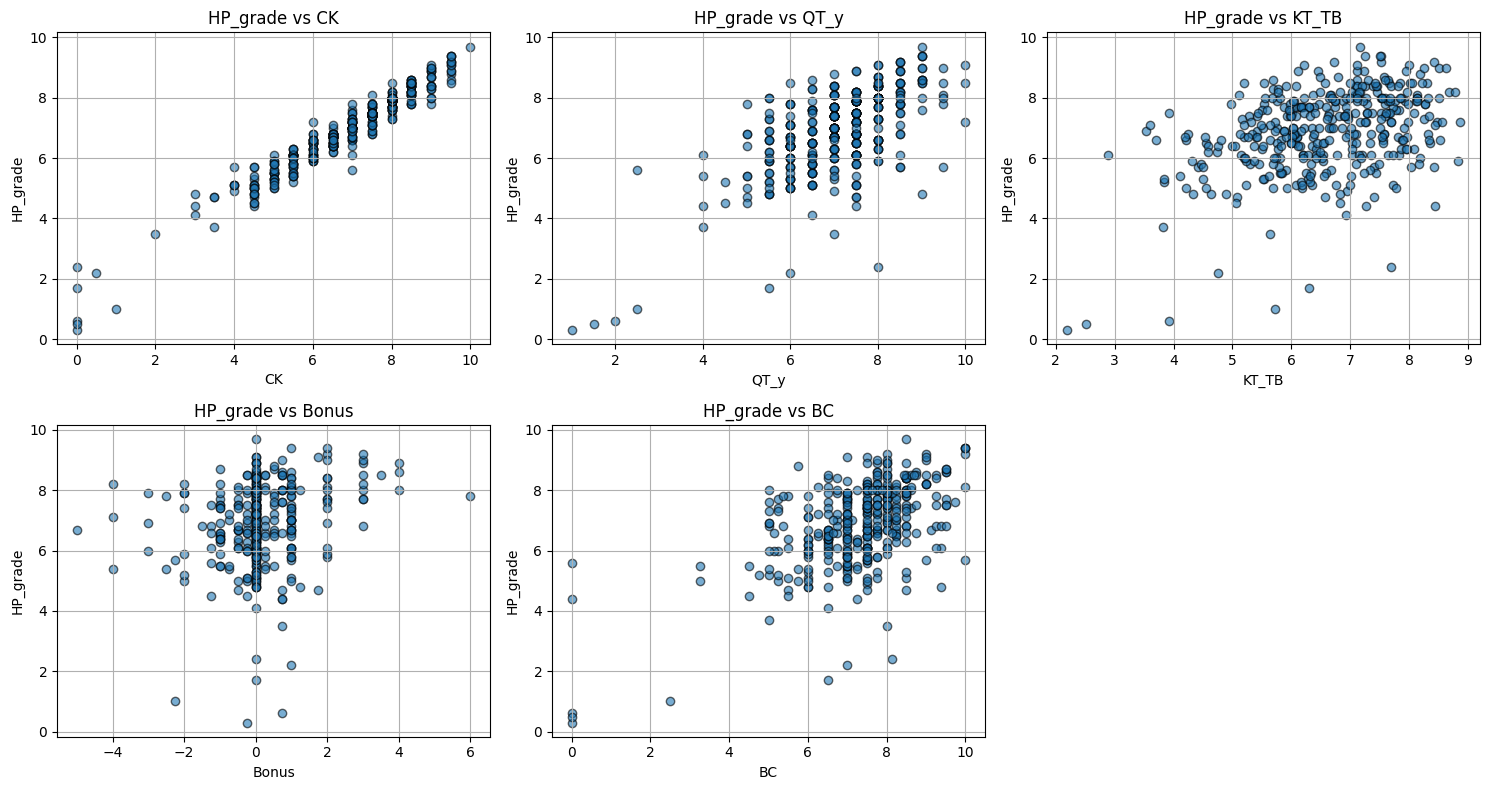

In [372]:
# Features to compare against HP_grade
features_to_compare = ['CK', 'QT_y', 'KT_TB', 'Bonus', 'BC']

# Filter only existing features
features_to_compare = [col for col in features_to_compare if col in combined_df.columns]

# Setup canvas size
n_cols = 3
n_rows = (len(features_to_compare) + n_cols - 1) // n_cols  # ceiling division

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for idx, feature in enumerate(features_to_compare, 1):
    plt.subplot(n_rows, n_cols, idx)
    plt.scatter(combined_df[feature], combined_df['HP_grade'], alpha=0.6, edgecolors='black')
    plt.title(f'HP_grade vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('HP_grade')
    plt.grid(True)

plt.tight_layout()
plt.show()




**HP\_grade vs CK:**

* **Relationship:** Strong positive linear relationship.
* **Comment:** As the value of CK increases, HP\_grade tends to increase consistently along a relatively straight line. This suggests a strong positive correlation between these two variables.

**HP\_grade vs QT\_y:**

* **Relationship:** Moderate positive linear relationship.
* **Comment:** There's a general upward trend in HP\_grade as QT\_y increases, but the points are more scattered compared to the HP\_grade vs CK plot. This indicates a positive correlation that is not as strong or consistent.

**HP\_grade vs KT\_TB:**

* **Relationship:** Weak or no clear linear relationship.
* **Comment:** The points are widely scattered with no discernible upward or downward trend. This suggests a very weak or non-existent linear relationship between HP\_grade and KT\_TB.

**HP\_grade vs Bonus:**

* **Relationship:** Very weak or no clear linear relationship.
* **Comment:** The data points are spread out, and there's no obvious linear pattern. HP\_grade values appear to be relatively consistent across the range of Bonus values shown.

**HP\_grade vs BC:**

* **Relationship:** Moderate positive linear relationship.
* **Comment:** Similar to the relationship with QT\_y, there's a general tendency for HP\_grade to increase as BC increases. However, the scatter is noticeable, indicating a moderate positive correlation.

**Summary of Preliminary Comments:**

* **Strong Positive Linearity:** HP\_grade vs CK
* **Moderate Positive Linearity:** HP\_grade vs QT\_y, HP\_grade vs BC
* **Weak or No Clear Linearity:** HP\_grade vs KT\_TB, HP\_grade vs Bonus


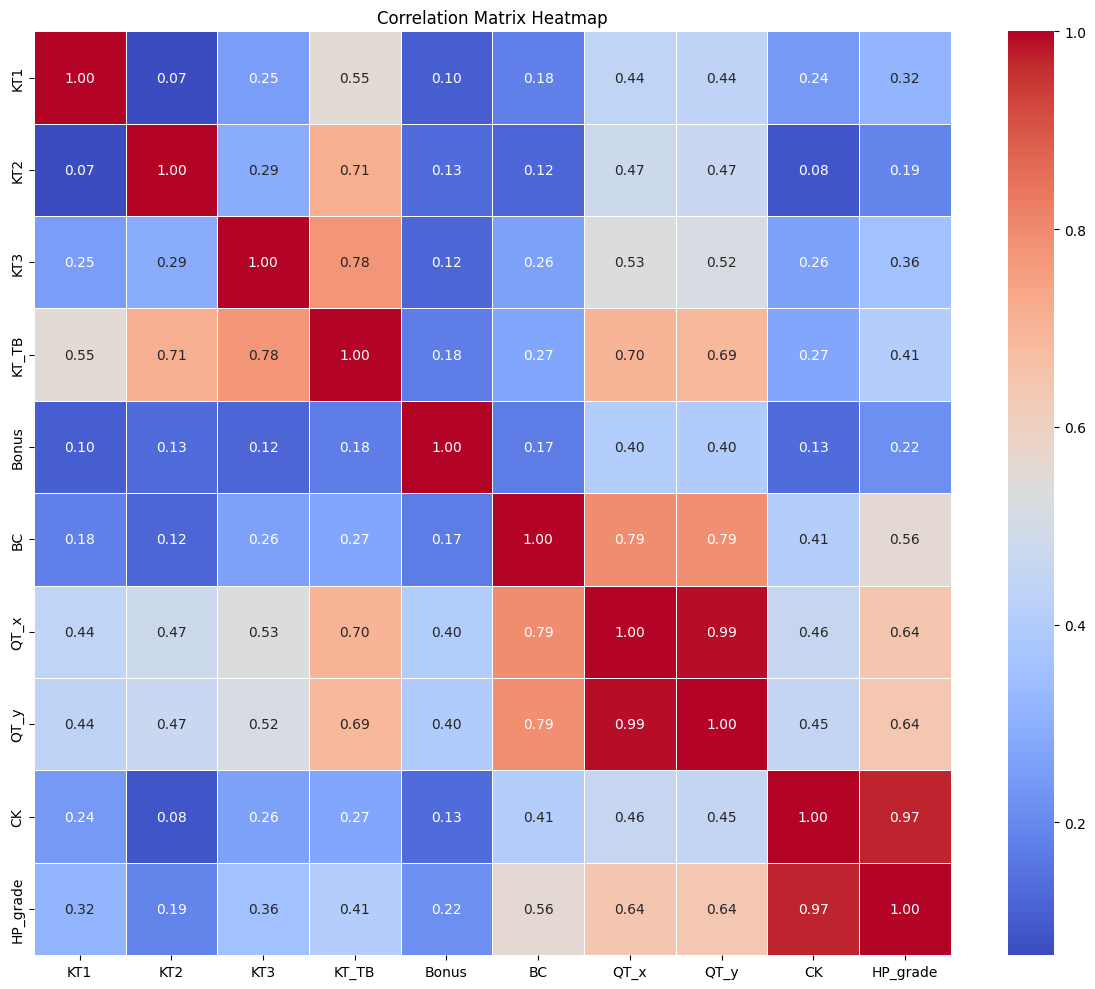

In [373]:
# Compute correlation matrix for all numeric columns
corr_matrix = combined_df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()


## Correlation Analysis with HP_grade

| Feature        | Correlation with HP_grade | Interpretation                                                                    |
|----------------|---------------------------|---------------------------------------------------------------------------------|
| CK             | 0.97                      | **Very strong positive correlation** – extremely predictive of HP\_grade.           |
| QT\_x / QT\_y  | 0.64                      | **Strong positive correlation** – useful predictor.                               |
| BC             | 0.56                      | **Moderate positive correlation** – relevant but less than QT/CK.                  |
| KT\_TB         | 0.41                      | **Moderate** – can contribute, especially with other features.                     |
| KT3            | 0.36                      | Mild to moderate correlation.                                                     |
| KT1            | 0.32                      | Same, contributes some predictive signal.                                         |
| Bonus          | 0.22                      | **Weak correlation** – may help marginally.                                     |
| KT2            | 0.19                      | **Very weak correlation** – likely not important for prediction.                  |

## Feature Implications Based on Variable Pairs

| Variable Pair         | Implication                                                                                                |
|-----------------------|------------------------------------------------------------------------------------------------------------|
| QT\_x & QT\_y         | Drop one – they’re duplicates.                                                                              |
| CK & QT\_y            | ⚠️ **High redundancy** – may inflate variance in regression. Consider removing one or using techniques like PCA. |
| KT1, KT2, KT3, KT\_TB | Some shared variance – consider dimensionality reduction (e.g., PCA) or regularization if modeling.        |

We should make a refined csv for training. 

In [374]:
combined_df.to_csv('data/csv/combined_data.csv', index=False)